In [1]:
import numpy as np
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
name = 'train_cleaned.csv'
train = pd.read_csv(name)
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,this is so cool it's like 'would you want your...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006.0,rejected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,59849,0.000000,thank you this would make my life a lot less a...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006.0,rejected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,59852,0.000000,this is such an urgent design problem kudos to...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006.0,rejected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,59855,0.000000,is this something i'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006.0,rejected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,59856,0.893617,haha you guys are a bunch of losers,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006.0,rejected,0.0,0.0,0.0,1.0,0.0,0.0,4.0,47.0


In [3]:
name = 'toxicity_individual_annotations.csv'
TA = pd.read_csv(name)
TA['worker'] = TA['worker'].astype(int)
TA.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat
0,59859,0,1,0,0,1,1,0.0,0.0
1,59859,1,1,0,0,0,1,0.0,0.0
2,59859,2,1,0,0,1,1,0.0,0.0
3,59859,3,1,1,0,0,1,0.0,0.0
4,59859,4,1,0,0,0,1,0.0,0.0


In [4]:
identities = ['disability', 'gender', 'race_or_ethnicity', 'religion', 'sexual_orientation']
toxicity = ['toxic', 'severe_toxic', 'identity_attack', 'insult', 'obscene', 'sexual_explicit', 'threat']
d_identities = {'disability': ['physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness','other_disability',],
                'gender': ['transgender','female','male','other_gender'],
                'race_or_ethnicity': ['white','asian','black','latino','other_race_or_ethnicity'],
                'religion': ['hindu','atheist','buddhist', 'christian','jewish','muslim','other_religion'],
                'sexual_orientation': ['bisexual','heterosexual','homosexual_gay_or_lesbian','other_sexual_orientation']}
identity_columns = []
for i in d_identities.items(): 
    identity_columns += i[1]
d_all_ids = []
for i in d_identities.items(): 
    d_all_ids += i[1]
d_all_ids += ['id','target']

In [5]:
TA['target_annotator'] = TA[toxicity].sum(axis=1)/len(toxicity)
TA.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat,target_annotator
0,59859,0,1,0,0,1,1,0.0,0.0,0.428571
1,59859,1,1,0,0,0,1,0.0,0.0,0.285714
2,59859,2,1,0,0,1,1,0.0,0.0,0.428571
3,59859,3,1,1,0,0,1,0.0,0.0,0.428571
4,59859,4,1,0,0,0,1,0.0,0.0,0.285714


In [6]:
train_simplified = train[d_all_ids]
train_simplified.head()

,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,transgender,female,male,other_gender,white,asian,...,christian,jewish,muslim,other_religion,bisexual,heterosexual,homosexual_gay_or_lesbian,other_sexual_orientation,id,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59848,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59849,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59852,0.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59855,0.000000
4,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59856,0.893617


In [7]:
df = TA.merge(train_simplified, on='id', how="left")
df.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat,target_annotator,...,buddhist,christian,jewish,muslim,other_religion,bisexual,heterosexual,homosexual_gay_or_lesbian,other_sexual_orientation,target
0,59859,0,1,0,0,1,1,0.0,0.0,0.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
1,59859,1,1,0,0,0,1,0.0,0.0,0.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
2,59859,2,1,0,0,1,1,0.0,0.0,0.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
3,59859,3,1,1,0,0,1,0.0,0.0,0.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
4,59859,4,1,0,0,0,1,0.0,0.0,0.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667


In [8]:
df.columns

Index(['id', 'worker', 'toxic', 'severe_toxic', 'identity_attack', 'insult',
       'obscene', 'sexual_explicit', 'threat', 'target_annotator',
       'physical_disability', 'intellectual_or_learning_disability',
       'psychiatric_or_mental_illness', 'other_disability', 'transgender',
       'female', 'male', 'other_gender', 'white', 'asian', 'black', 'latino',
       'other_race_or_ethnicity', 'hindu', 'atheist', 'buddhist', 'christian',
       'jewish', 'muslim', 'other_religion', 'bisexual', 'heterosexual',
       'homosexual_gay_or_lesbian', 'other_sexual_orientation', 'target'],
      dtype='object')

In [9]:
df.shape

(10271695, 35)

In [10]:
def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, True, False)

def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    convert_to_bool(bool_df, 'target')
    for col in identity_columns:
        convert_to_bool(bool_df, col)
    return bool_df

SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[df[subgroup] & ~df[label]]
    non_subgroup_positive_examples = df[~df[subgroup] & df[label]]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[df[subgroup] & df[label]]
    non_subgroup_negative_examples = df[~df[subgroup] & ~df[label]]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': len(dataset[dataset[subgroup]])
        }
        record[SUBGROUP_AUC] = round(compute_subgroup_auc(dataset, subgroup, label_col, model),3)
        record[BPSN_AUC] = round(compute_bpsn_auc(dataset, subgroup, label_col, model),3)
        record[BNSP_AUC] = round(compute_bnsp_auc(dataset, subgroup, label_col, model),3)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)

In [11]:
validate_df = df.copy() 
validate_df = convert_dataframe_to_bool(validate_df)
validate_df.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat,target_annotator,...,buddhist,christian,jewish,muslim,other_religion,bisexual,heterosexual,homosexual_gay_or_lesbian,other_sexual_orientation,target
0,59859,0,1,0,0,1,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,False,False,True
1,59859,1,1,0,0,0,1,0.0,0.0,0.285714,...,False,False,False,False,False,False,False,False,False,True
2,59859,2,1,0,0,1,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,False,False,True
3,59859,3,1,1,0,0,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,False,False,True
4,59859,4,1,0,0,0,1,0.0,0.0,0.285714,...,False,False,False,False,False,False,False,False,False,True


In [12]:
len(validate_df.groupby(['worker'])['id'].count())

8042

In [13]:
validate_df.groupby(['worker'])['id'].count()

worker
0       8192
1        519
2       2667
3        230
4       6746
        ... 
8037       2
8038       1
8039       2
8040       1
8041       1
Name: id, Length: 8042, dtype: int64

In [14]:
validate_df.groupby(['worker'])['id'].count().values

array([8192,  519, 2667, ...,    2,    1,    1])

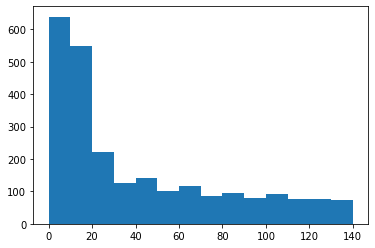

In [15]:
plt.hist(validate_df.groupby(['worker'])['id'].count().values, bins=np.arange(0, 150, 10))
plt.show()

In [16]:
np.percentile(validate_df.groupby(['worker'])['id'].count().values, 10)

10.0

In [17]:
np.percentile(validate_df.groupby(['worker'])['id'].count().values, 50)

488.0

In [18]:
p = 10

nbr_comments = validate_df.groupby(['worker'])['id'].count().values
min_comments = np.percentile(validate_df.groupby(['worker'])['id'].count().values, p)

In [19]:
nbr_comments_dict = validate_df.groupby(['worker'])['id'].count().to_dict()

In [20]:
nbr_comments_dict

{0: 8192,
 1: 519,
 2: 2667,
 3: 230,
 4: 6746,
 5: 3216,
 6: 1714,
 7: 3061,
 8: 1370,
 9: 953,
 10: 4934,
 11: 1140,
 12: 4000,
 13: 863,
 14: 4660,
 15: 1085,
 16: 389,
 17: 4746,
 18: 266,
 19: 5658,
 20: 2972,
 21: 6678,
 22: 340,
 23: 940,
 24: 10,
 25: 3310,
 26: 540,
 27: 8297,
 28: 3990,
 29: 4172,
 30: 4136,
 31: 979,
 32: 323,
 33: 278,
 34: 47,
 35: 8074,
 36: 1108,
 37: 3280,
 38: 6766,
 39: 1544,
 40: 5225,
 41: 2017,
 42: 974,
 43: 4723,
 44: 1686,
 45: 6816,
 46: 2608,
 47: 2110,
 48: 4887,
 49: 3718,
 50: 4100,
 51: 4229,
 52: 2235,
 53: 429,
 54: 676,
 55: 345,
 56: 6895,
 57: 2907,
 58: 7028,
 59: 8293,
 60: 5402,
 61: 1032,
 62: 2935,
 63: 1202,
 64: 8312,
 65: 5789,
 66: 7078,
 67: 3945,
 68: 1419,
 69: 4168,
 70: 787,
 71: 5719,
 72: 1570,
 73: 3082,
 74: 8297,
 75: 8572,
 76: 8131,
 77: 3528,
 78: 1476,
 79: 3634,
 80: 8137,
 81: 2153,
 82: 615,
 83: 2513,
 84: 5053,
 85: 653,
 86: 5722,
 87: 7548,
 88: 495,
 89: 7668,
 90: 130,
 91: 6656,
 92: 1275,
 93: 998,
 9

In [21]:
keep_comment = [False] * len(validate_df)
count = 0
for i in range(len(validate_df)):
    wid = validate_df.iloc[i]['worker']
    if nbr_comments_dict[wid] >= min_comments:
        keep_comment[i] = True
    if count % 1000 == 0:
        print(count, len(validate_df))
    count += 1

0 10271695
1000 10271695
2000 10271695
3000 10271695
4000 10271695
5000 10271695
6000 10271695
7000 10271695
8000 10271695
9000 10271695
10000 10271695
11000 10271695
12000 10271695
13000 10271695
14000 10271695
15000 10271695
16000 10271695
17000 10271695
18000 10271695
19000 10271695
20000 10271695
21000 10271695
22000 10271695
23000 10271695
24000 10271695
25000 10271695
26000 10271695
27000 10271695
28000 10271695
29000 10271695
30000 10271695
31000 10271695
32000 10271695
33000 10271695
34000 10271695
35000 10271695
36000 10271695
37000 10271695
38000 10271695
39000 10271695
40000 10271695
41000 10271695
42000 10271695
43000 10271695
44000 10271695
45000 10271695
46000 10271695
47000 10271695
48000 10271695
49000 10271695
50000 10271695
51000 10271695
52000 10271695
53000 10271695
54000 10271695
55000 10271695
56000 10271695
57000 10271695
58000 10271695
59000 10271695
60000 10271695
61000 10271695
62000 10271695
63000 10271695
64000 10271695
65000 10271695
66000 10271695
67000 10

522000 10271695
523000 10271695
524000 10271695
525000 10271695
526000 10271695
527000 10271695
528000 10271695
529000 10271695
530000 10271695
531000 10271695
532000 10271695
533000 10271695
534000 10271695
535000 10271695
536000 10271695
537000 10271695
538000 10271695
539000 10271695
540000 10271695
541000 10271695
542000 10271695
543000 10271695
544000 10271695
545000 10271695
546000 10271695
547000 10271695
548000 10271695
549000 10271695
550000 10271695
551000 10271695
552000 10271695
553000 10271695
554000 10271695
555000 10271695
556000 10271695
557000 10271695
558000 10271695
559000 10271695
560000 10271695
561000 10271695
562000 10271695
563000 10271695
564000 10271695
565000 10271695
566000 10271695
567000 10271695
568000 10271695
569000 10271695
570000 10271695
571000 10271695
572000 10271695
573000 10271695
574000 10271695
575000 10271695
576000 10271695
577000 10271695
578000 10271695
579000 10271695
580000 10271695
581000 10271695
582000 10271695
583000 10271695
584000 1

1034000 10271695
1035000 10271695
1036000 10271695
1037000 10271695
1038000 10271695
1039000 10271695
1040000 10271695
1041000 10271695
1042000 10271695
1043000 10271695
1044000 10271695
1045000 10271695
1046000 10271695
1047000 10271695
1048000 10271695
1049000 10271695
1050000 10271695
1051000 10271695
1052000 10271695
1053000 10271695
1054000 10271695
1055000 10271695
1056000 10271695
1057000 10271695
1058000 10271695
1059000 10271695
1060000 10271695
1061000 10271695
1062000 10271695
1063000 10271695
1064000 10271695
1065000 10271695
1066000 10271695
1067000 10271695
1068000 10271695
1069000 10271695
1070000 10271695
1071000 10271695
1072000 10271695
1073000 10271695
1074000 10271695
1075000 10271695
1076000 10271695
1077000 10271695
1078000 10271695
1079000 10271695
1080000 10271695
1081000 10271695
1082000 10271695
1083000 10271695
1084000 10271695
1085000 10271695
1086000 10271695
1087000 10271695
1088000 10271695
1089000 10271695
1090000 10271695
1091000 10271695
1092000 102716

1519000 10271695
1520000 10271695
1521000 10271695
1522000 10271695
1523000 10271695
1524000 10271695
1525000 10271695
1526000 10271695
1527000 10271695
1528000 10271695
1529000 10271695
1530000 10271695
1531000 10271695
1532000 10271695
1533000 10271695
1534000 10271695
1535000 10271695
1536000 10271695
1537000 10271695
1538000 10271695
1539000 10271695
1540000 10271695
1541000 10271695
1542000 10271695
1543000 10271695
1544000 10271695
1545000 10271695
1546000 10271695
1547000 10271695
1548000 10271695
1549000 10271695
1550000 10271695
1551000 10271695
1552000 10271695
1553000 10271695
1554000 10271695
1555000 10271695
1556000 10271695
1557000 10271695
1558000 10271695
1559000 10271695
1560000 10271695
1561000 10271695
1562000 10271695
1563000 10271695
1564000 10271695
1565000 10271695
1566000 10271695
1567000 10271695
1568000 10271695
1569000 10271695
1570000 10271695
1571000 10271695
1572000 10271695
1573000 10271695
1574000 10271695
1575000 10271695
1576000 10271695
1577000 102716

2002000 10271695
2003000 10271695
2004000 10271695
2005000 10271695
2006000 10271695
2007000 10271695
2008000 10271695
2009000 10271695
2010000 10271695
2011000 10271695
2012000 10271695
2013000 10271695
2014000 10271695
2015000 10271695
2016000 10271695
2017000 10271695
2018000 10271695
2019000 10271695
2020000 10271695
2021000 10271695
2022000 10271695
2023000 10271695
2024000 10271695
2025000 10271695
2026000 10271695
2027000 10271695
2028000 10271695
2029000 10271695
2030000 10271695
2031000 10271695
2032000 10271695
2033000 10271695
2034000 10271695
2035000 10271695
2036000 10271695
2037000 10271695
2038000 10271695
2039000 10271695
2040000 10271695
2041000 10271695
2042000 10271695
2043000 10271695
2044000 10271695
2045000 10271695
2046000 10271695
2047000 10271695
2048000 10271695
2049000 10271695
2050000 10271695
2051000 10271695
2052000 10271695
2053000 10271695
2054000 10271695
2055000 10271695
2056000 10271695
2057000 10271695
2058000 10271695
2059000 10271695
2060000 102716

2485000 10271695
2486000 10271695
2487000 10271695
2488000 10271695
2489000 10271695
2490000 10271695
2491000 10271695
2492000 10271695
2493000 10271695
2494000 10271695
2495000 10271695
2496000 10271695
2497000 10271695
2498000 10271695
2499000 10271695
2500000 10271695
2501000 10271695
2502000 10271695
2503000 10271695
2504000 10271695
2505000 10271695
2506000 10271695
2507000 10271695
2508000 10271695
2509000 10271695
2510000 10271695
2511000 10271695
2512000 10271695
2513000 10271695
2514000 10271695
2515000 10271695
2516000 10271695
2517000 10271695
2518000 10271695
2519000 10271695
2520000 10271695
2521000 10271695
2522000 10271695
2523000 10271695
2524000 10271695
2525000 10271695
2526000 10271695
2527000 10271695
2528000 10271695
2529000 10271695
2530000 10271695
2531000 10271695
2532000 10271695
2533000 10271695
2534000 10271695
2535000 10271695
2536000 10271695
2537000 10271695
2538000 10271695
2539000 10271695
2540000 10271695
2541000 10271695
2542000 10271695
2543000 102716

2968000 10271695
2969000 10271695
2970000 10271695
2971000 10271695
2972000 10271695
2973000 10271695
2974000 10271695
2975000 10271695
2976000 10271695
2977000 10271695
2978000 10271695
2979000 10271695
2980000 10271695
2981000 10271695
2982000 10271695
2983000 10271695
2984000 10271695
2985000 10271695
2986000 10271695
2987000 10271695
2988000 10271695
2989000 10271695
2990000 10271695
2991000 10271695
2992000 10271695
2993000 10271695
2994000 10271695
2995000 10271695
2996000 10271695
2997000 10271695
2998000 10271695
2999000 10271695
3000000 10271695
3001000 10271695
3002000 10271695
3003000 10271695
3004000 10271695
3005000 10271695
3006000 10271695
3007000 10271695
3008000 10271695
3009000 10271695
3010000 10271695
3011000 10271695
3012000 10271695
3013000 10271695
3014000 10271695
3015000 10271695
3016000 10271695
3017000 10271695
3018000 10271695
3019000 10271695
3020000 10271695
3021000 10271695
3022000 10271695
3023000 10271695
3024000 10271695
3025000 10271695
3026000 102716

3450000 10271695
3451000 10271695
3452000 10271695
3453000 10271695
3454000 10271695
3455000 10271695
3456000 10271695
3457000 10271695
3458000 10271695
3459000 10271695
3460000 10271695
3461000 10271695
3462000 10271695
3463000 10271695
3464000 10271695
3465000 10271695
3466000 10271695
3467000 10271695
3468000 10271695
3469000 10271695
3470000 10271695
3471000 10271695
3472000 10271695
3473000 10271695
3474000 10271695
3475000 10271695
3476000 10271695
3477000 10271695
3478000 10271695
3479000 10271695
3480000 10271695
3481000 10271695
3482000 10271695
3483000 10271695
3484000 10271695
3485000 10271695
3486000 10271695
3487000 10271695
3488000 10271695
3489000 10271695
3490000 10271695
3491000 10271695
3492000 10271695
3493000 10271695
3494000 10271695
3495000 10271695
3496000 10271695
3497000 10271695
3498000 10271695
3499000 10271695
3500000 10271695
3501000 10271695
3502000 10271695
3503000 10271695
3504000 10271695
3505000 10271695
3506000 10271695
3507000 10271695
3508000 102716

3932000 10271695
3933000 10271695
3934000 10271695
3935000 10271695
3936000 10271695
3937000 10271695
3938000 10271695
3939000 10271695
3940000 10271695
3941000 10271695
3942000 10271695
3943000 10271695
3944000 10271695
3945000 10271695
3946000 10271695
3947000 10271695
3948000 10271695
3949000 10271695
3950000 10271695
3951000 10271695
3952000 10271695
3953000 10271695
3954000 10271695
3955000 10271695
3956000 10271695
3957000 10271695
3958000 10271695
3959000 10271695
3960000 10271695
3961000 10271695
3962000 10271695
3963000 10271695
3964000 10271695
3965000 10271695
3966000 10271695
3967000 10271695
3968000 10271695
3969000 10271695
3970000 10271695
3971000 10271695
3972000 10271695
3973000 10271695
3974000 10271695
3975000 10271695
3976000 10271695
3977000 10271695
3978000 10271695
3979000 10271695
3980000 10271695
3981000 10271695
3982000 10271695
3983000 10271695
3984000 10271695
3985000 10271695
3986000 10271695
3987000 10271695
3988000 10271695
3989000 10271695
3990000 102716

4416000 10271695
4417000 10271695
4418000 10271695
4419000 10271695
4420000 10271695
4421000 10271695
4422000 10271695
4423000 10271695
4424000 10271695
4425000 10271695
4426000 10271695
4427000 10271695
4428000 10271695
4429000 10271695
4430000 10271695
4431000 10271695
4432000 10271695
4433000 10271695
4434000 10271695
4435000 10271695
4436000 10271695
4437000 10271695
4438000 10271695
4439000 10271695
4440000 10271695
4441000 10271695
4442000 10271695
4443000 10271695
4444000 10271695
4445000 10271695
4446000 10271695
4447000 10271695
4448000 10271695
4449000 10271695
4450000 10271695
4451000 10271695
4452000 10271695
4453000 10271695
4454000 10271695
4455000 10271695
4456000 10271695
4457000 10271695
4458000 10271695
4459000 10271695
4460000 10271695
4461000 10271695
4462000 10271695
4463000 10271695
4464000 10271695
4465000 10271695
4466000 10271695
4467000 10271695
4468000 10271695
4469000 10271695
4470000 10271695
4471000 10271695
4472000 10271695
4473000 10271695
4474000 102716

4898000 10271695
4899000 10271695
4900000 10271695
4901000 10271695
4902000 10271695
4903000 10271695
4904000 10271695
4905000 10271695
4906000 10271695
4907000 10271695
4908000 10271695
4909000 10271695
4910000 10271695
4911000 10271695
4912000 10271695
4913000 10271695
4914000 10271695
4915000 10271695
4916000 10271695
4917000 10271695
4918000 10271695
4919000 10271695
4920000 10271695
4921000 10271695
4922000 10271695
4923000 10271695
4924000 10271695
4925000 10271695
4926000 10271695
4927000 10271695
4928000 10271695
4929000 10271695
4930000 10271695
4931000 10271695
4932000 10271695
4933000 10271695
4934000 10271695
4935000 10271695
4936000 10271695
4937000 10271695
4938000 10271695
4939000 10271695
4940000 10271695
4941000 10271695
4942000 10271695
4943000 10271695
4944000 10271695
4945000 10271695
4946000 10271695
4947000 10271695
4948000 10271695
4949000 10271695
4950000 10271695
4951000 10271695
4952000 10271695
4953000 10271695
4954000 10271695
4955000 10271695
4956000 102716

5380000 10271695
5381000 10271695
5382000 10271695
5383000 10271695
5384000 10271695
5385000 10271695
5386000 10271695
5387000 10271695
5388000 10271695
5389000 10271695
5390000 10271695
5391000 10271695
5392000 10271695
5393000 10271695
5394000 10271695
5395000 10271695
5396000 10271695
5397000 10271695
5398000 10271695
5399000 10271695
5400000 10271695
5401000 10271695
5402000 10271695
5403000 10271695
5404000 10271695
5405000 10271695
5406000 10271695
5407000 10271695
5408000 10271695
5409000 10271695
5410000 10271695
5411000 10271695
5412000 10271695
5413000 10271695
5414000 10271695
5415000 10271695
5416000 10271695
5417000 10271695
5418000 10271695
5419000 10271695
5420000 10271695
5421000 10271695
5422000 10271695
5423000 10271695
5424000 10271695
5425000 10271695
5426000 10271695
5427000 10271695
5428000 10271695
5429000 10271695
5430000 10271695
5431000 10271695
5432000 10271695
5433000 10271695
5434000 10271695
5435000 10271695
5436000 10271695
5437000 10271695
5438000 102716

5863000 10271695
5864000 10271695
5865000 10271695
5866000 10271695
5867000 10271695
5868000 10271695
5869000 10271695
5870000 10271695
5871000 10271695
5872000 10271695
5873000 10271695
5874000 10271695
5875000 10271695
5876000 10271695
5877000 10271695
5878000 10271695
5879000 10271695
5880000 10271695
5881000 10271695
5882000 10271695
5883000 10271695
5884000 10271695
5885000 10271695
5886000 10271695
5887000 10271695
5888000 10271695
5889000 10271695
5890000 10271695
5891000 10271695
5892000 10271695
5893000 10271695
5894000 10271695
5895000 10271695
5896000 10271695
5897000 10271695
5898000 10271695
5899000 10271695
5900000 10271695
5901000 10271695
5902000 10271695
5903000 10271695
5904000 10271695
5905000 10271695
5906000 10271695
5907000 10271695
5908000 10271695
5909000 10271695
5910000 10271695
5911000 10271695
5912000 10271695
5913000 10271695
5914000 10271695
5915000 10271695
5916000 10271695
5917000 10271695
5918000 10271695
5919000 10271695
5920000 10271695
5921000 102716

6345000 10271695
6346000 10271695
6347000 10271695
6348000 10271695
6349000 10271695
6350000 10271695
6351000 10271695
6352000 10271695
6353000 10271695
6354000 10271695
6355000 10271695
6356000 10271695
6357000 10271695
6358000 10271695
6359000 10271695
6360000 10271695
6361000 10271695
6362000 10271695
6363000 10271695
6364000 10271695
6365000 10271695
6366000 10271695
6367000 10271695
6368000 10271695
6369000 10271695
6370000 10271695
6371000 10271695
6372000 10271695
6373000 10271695
6374000 10271695
6375000 10271695
6376000 10271695
6377000 10271695
6378000 10271695
6379000 10271695
6380000 10271695
6381000 10271695
6382000 10271695
6383000 10271695
6384000 10271695
6385000 10271695
6386000 10271695
6387000 10271695
6388000 10271695
6389000 10271695
6390000 10271695
6391000 10271695
6392000 10271695
6393000 10271695
6394000 10271695
6395000 10271695
6396000 10271695
6397000 10271695
6398000 10271695
6399000 10271695
6400000 10271695
6401000 10271695
6402000 10271695
6403000 102716

6829000 10271695
6830000 10271695
6831000 10271695
6832000 10271695
6833000 10271695
6834000 10271695
6835000 10271695
6836000 10271695
6837000 10271695
6838000 10271695
6839000 10271695
6840000 10271695
6841000 10271695
6842000 10271695
6843000 10271695
6844000 10271695
6845000 10271695
6846000 10271695
6847000 10271695
6848000 10271695
6849000 10271695
6850000 10271695
6851000 10271695
6852000 10271695
6853000 10271695
6854000 10271695
6855000 10271695
6856000 10271695
6857000 10271695
6858000 10271695
6859000 10271695
6860000 10271695
6861000 10271695
6862000 10271695
6863000 10271695
6864000 10271695
6865000 10271695
6866000 10271695
6867000 10271695
6868000 10271695
6869000 10271695
6870000 10271695
6871000 10271695
6872000 10271695
6873000 10271695
6874000 10271695
6875000 10271695
6876000 10271695
6877000 10271695
6878000 10271695
6879000 10271695
6880000 10271695
6881000 10271695
6882000 10271695
6883000 10271695
6884000 10271695
6885000 10271695
6886000 10271695
6887000 102716

7314000 10271695
7315000 10271695
7316000 10271695
7317000 10271695
7318000 10271695
7319000 10271695
7320000 10271695
7321000 10271695
7322000 10271695
7323000 10271695
7324000 10271695
7325000 10271695
7326000 10271695
7327000 10271695
7328000 10271695
7329000 10271695
7330000 10271695
7331000 10271695
7332000 10271695
7333000 10271695
7334000 10271695
7335000 10271695
7336000 10271695
7337000 10271695
7338000 10271695
7339000 10271695
7340000 10271695
7341000 10271695
7342000 10271695
7343000 10271695
7344000 10271695
7345000 10271695
7346000 10271695
7347000 10271695
7348000 10271695
7349000 10271695
7350000 10271695
7351000 10271695
7352000 10271695
7353000 10271695
7354000 10271695
7355000 10271695
7356000 10271695
7357000 10271695
7358000 10271695
7359000 10271695
7360000 10271695
7361000 10271695
7362000 10271695
7363000 10271695
7364000 10271695
7365000 10271695
7366000 10271695
7367000 10271695
7368000 10271695
7369000 10271695
7370000 10271695
7371000 10271695
7372000 102716

7798000 10271695
7799000 10271695
7800000 10271695
7801000 10271695
7802000 10271695
7803000 10271695
7804000 10271695
7805000 10271695
7806000 10271695
7807000 10271695
7808000 10271695
7809000 10271695
7810000 10271695
7811000 10271695
7812000 10271695
7813000 10271695
7814000 10271695
7815000 10271695
7816000 10271695
7817000 10271695
7818000 10271695
7819000 10271695
7820000 10271695
7821000 10271695
7822000 10271695
7823000 10271695
7824000 10271695
7825000 10271695
7826000 10271695
7827000 10271695
7828000 10271695
7829000 10271695
7830000 10271695
7831000 10271695
7832000 10271695
7833000 10271695
7834000 10271695
7835000 10271695
7836000 10271695
7837000 10271695
7838000 10271695
7839000 10271695
7840000 10271695
7841000 10271695
7842000 10271695
7843000 10271695
7844000 10271695
7845000 10271695
7846000 10271695
7847000 10271695
7848000 10271695
7849000 10271695
7850000 10271695
7851000 10271695
7852000 10271695
7853000 10271695
7854000 10271695
7855000 10271695
7856000 102716

8284000 10271695
8285000 10271695
8286000 10271695
8287000 10271695
8288000 10271695
8289000 10271695
8290000 10271695
8291000 10271695
8292000 10271695
8293000 10271695
8294000 10271695
8295000 10271695
8296000 10271695
8297000 10271695
8298000 10271695
8299000 10271695
8300000 10271695
8301000 10271695
8302000 10271695
8303000 10271695
8304000 10271695
8305000 10271695
8306000 10271695
8307000 10271695
8308000 10271695
8309000 10271695
8310000 10271695
8311000 10271695
8312000 10271695
8313000 10271695
8314000 10271695
8315000 10271695
8316000 10271695
8317000 10271695
8318000 10271695
8319000 10271695
8320000 10271695
8321000 10271695
8322000 10271695
8323000 10271695
8324000 10271695
8325000 10271695
8326000 10271695
8327000 10271695
8328000 10271695
8329000 10271695
8330000 10271695
8331000 10271695
8332000 10271695
8333000 10271695
8334000 10271695
8335000 10271695
8336000 10271695
8337000 10271695
8338000 10271695
8339000 10271695
8340000 10271695
8341000 10271695
8342000 102716

8768000 10271695
8769000 10271695
8770000 10271695
8771000 10271695
8772000 10271695
8773000 10271695
8774000 10271695
8775000 10271695
8776000 10271695
8777000 10271695
8778000 10271695
8779000 10271695
8780000 10271695
8781000 10271695
8782000 10271695
8783000 10271695
8784000 10271695
8785000 10271695
8786000 10271695
8787000 10271695
8788000 10271695
8789000 10271695
8790000 10271695
8791000 10271695
8792000 10271695
8793000 10271695
8794000 10271695
8795000 10271695
8796000 10271695
8797000 10271695
8798000 10271695
8799000 10271695
8800000 10271695
8801000 10271695
8802000 10271695
8803000 10271695
8804000 10271695
8805000 10271695
8806000 10271695
8807000 10271695
8808000 10271695
8809000 10271695
8810000 10271695
8811000 10271695
8812000 10271695
8813000 10271695
8814000 10271695
8815000 10271695
8816000 10271695
8817000 10271695
8818000 10271695
8819000 10271695
8820000 10271695
8821000 10271695
8822000 10271695
8823000 10271695
8824000 10271695
8825000 10271695
8826000 102716

9251000 10271695
9252000 10271695
9253000 10271695
9254000 10271695
9255000 10271695
9256000 10271695
9257000 10271695
9258000 10271695
9259000 10271695
9260000 10271695
9261000 10271695
9262000 10271695
9263000 10271695
9264000 10271695
9265000 10271695
9266000 10271695
9267000 10271695
9268000 10271695
9269000 10271695
9270000 10271695
9271000 10271695
9272000 10271695
9273000 10271695
9274000 10271695
9275000 10271695
9276000 10271695
9277000 10271695
9278000 10271695
9279000 10271695
9280000 10271695
9281000 10271695
9282000 10271695
9283000 10271695
9284000 10271695
9285000 10271695
9286000 10271695
9287000 10271695
9288000 10271695
9289000 10271695
9290000 10271695
9291000 10271695
9292000 10271695
9293000 10271695
9294000 10271695
9295000 10271695
9296000 10271695
9297000 10271695
9298000 10271695
9299000 10271695
9300000 10271695
9301000 10271695
9302000 10271695
9303000 10271695
9304000 10271695
9305000 10271695
9306000 10271695
9307000 10271695
9308000 10271695
9309000 102716

9734000 10271695
9735000 10271695
9736000 10271695
9737000 10271695
9738000 10271695
9739000 10271695
9740000 10271695
9741000 10271695
9742000 10271695
9743000 10271695
9744000 10271695
9745000 10271695
9746000 10271695
9747000 10271695
9748000 10271695
9749000 10271695
9750000 10271695
9751000 10271695
9752000 10271695
9753000 10271695
9754000 10271695
9755000 10271695
9756000 10271695
9757000 10271695
9758000 10271695
9759000 10271695
9760000 10271695
9761000 10271695
9762000 10271695
9763000 10271695
9764000 10271695
9765000 10271695
9766000 10271695
9767000 10271695
9768000 10271695
9769000 10271695
9770000 10271695
9771000 10271695
9772000 10271695
9773000 10271695
9774000 10271695
9775000 10271695
9776000 10271695
9777000 10271695
9778000 10271695
9779000 10271695
9780000 10271695
9781000 10271695
9782000 10271695
9783000 10271695
9784000 10271695
9785000 10271695
9786000 10271695
9787000 10271695
9788000 10271695
9789000 10271695
9790000 10271695
9791000 10271695
9792000 102716

10206000 10271695
10207000 10271695
10208000 10271695
10209000 10271695
10210000 10271695
10211000 10271695
10212000 10271695
10213000 10271695
10214000 10271695
10215000 10271695
10216000 10271695
10217000 10271695
10218000 10271695
10219000 10271695
10220000 10271695
10221000 10271695
10222000 10271695
10223000 10271695
10224000 10271695
10225000 10271695
10226000 10271695
10227000 10271695
10228000 10271695
10229000 10271695
10230000 10271695
10231000 10271695
10232000 10271695
10233000 10271695
10234000 10271695
10235000 10271695
10236000 10271695
10237000 10271695
10238000 10271695
10239000 10271695
10240000 10271695
10241000 10271695
10242000 10271695
10243000 10271695
10244000 10271695
10245000 10271695
10246000 10271695
10247000 10271695
10248000 10271695
10249000 10271695
10250000 10271695
10251000 10271695
10252000 10271695
10253000 10271695
10254000 10271695
10255000 10271695
10256000 10271695
10257000 10271695
10258000 10271695
10259000 10271695
10260000 10271695
10261000 1

In [22]:
validate_df['filter'] = keep_comment

In [ ]:
#validate_df.to_csv('validate_df.csv', index=False)

In [23]:
validate_df['nbr_comments'] = validate_df['worker'].map(nbr_comments_dict)

In [24]:
validate_df.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat,target_annotator,...,jewish,muslim,other_religion,bisexual,heterosexual,homosexual_gay_or_lesbian,other_sexual_orientation,target,filter,nbr_comments
0,59859,0,1,0,0,1,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,True,True,8192
1,59859,1,1,0,0,0,1,0.0,0.0,0.285714,...,False,False,False,False,False,False,False,True,True,519
2,59859,2,1,0,0,1,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,True,True,2667
3,59859,3,1,1,0,0,1,0.0,0.0,0.428571,...,False,False,False,False,False,False,False,True,True,230
4,59859,4,1,0,0,0,1,0.0,0.0,0.285714,...,False,False,False,False,False,False,False,True,True,6746


In [ ]:
#validate_df.to_csv('validate_df_with_nbr_comments.csv', index=False)

In [25]:
validate_df.shape

(10271695, 37)

In [26]:
relevant_workers_df = validate_df[validate_df['nbr_comments'] >= min_comments]

In [27]:
relevant_workers_df.shape

(10266880, 37)

In [28]:
len(relevant_workers_df.groupby(['worker'])['id'].count())

7403

In [29]:
warnings.filterwarnings('ignore')

TOXICITY_COLUMN = 'target' 
NAME = 'target_annotator' 
identity_list = ['heterosexual', 'psychiatric_or_mental_illness', 'white',
                 'transgender', 'black', 'bisexual', 'homosexual_gay_or_lesbian',
                 'male', 'christian', 'muslim', 'female', 'jewish', 'asian',
                 'latino', 'atheist', 'other_religion', 'other_race_or_ethnicity',
                 'physical_disability', 'intellectual_or_learning_disability',
                 'other_disability', 'other_gender', 'hindu', 'buddhist',
                 'other_sexual_orientation'
                ]
agg_df = pd.DataFrame(columns=['worker'] + identity_list)

count = 0
for k in relevant_workers_df['worker'].unique():
    worker_data = relevant_workers_df[relevant_workers_df['worker'] == k]
    bias_metrics_df = compute_bias_metrics_for_model(worker_data, identity_columns, NAME, TOXICITY_COLUMN)
    values = np.nanmean(bias_metrics_df[['subgroup_auc', 'bpsn_auc', 'bnsp_auc']].values, axis=1)
    row = np.array([k] + values.tolist())
    row_dict = {'worker': int(k)}
    for kk, kv in zip(identity_list, values):
        row_dict[kk] = kv
    agg_df = agg_df.append(row_dict, ignore_index=True)
    
    if count % 100 == 0:
        print(count, len(relevant_workers_df['worker'].unique()))
    count += 1
    
agg_df['worker'] = agg_df['worker'].astype(int)

0 7403
100 7403
200 7403
300 7403
400 7403
500 7403
600 7403
700 7403
800 7403
900 7403
1000 7403
1100 7403
1200 7403
1300 7403
1400 7403
1500 7403
1600 7403
1700 7403
1800 7403
1900 7403
2000 7403
2100 7403
2200 7403
2300 7403
2400 7403
2500 7403
2600 7403
2700 7403
2800 7403
2900 7403
3000 7403
3100 7403
3200 7403
3300 7403
3400 7403
3500 7403
3600 7403
3700 7403
3800 7403
3900 7403
4000 7403
4100 7403
4200 7403
4300 7403
4400 7403
4500 7403
4600 7403
4700 7403
4800 7403
4900 7403
5000 7403
5100 7403
5200 7403
5300 7403
5400 7403
5500 7403
5600 7403
5700 7403
5800 7403
5900 7403
6000 7403
6100 7403
6200 7403
6300 7403
6400 7403
6500 7403
6600 7403
6700 7403
6800 7403
6900 7403
7000 7403
7100 7403
7200 7403
7300 7403
7400 7403


In [30]:
agg_df.head()

,worker,heterosexual,psychiatric_or_mental_illness,white,transgender,black,bisexual,homosexual_gay_or_lesbian,male,christian,...,atheist,other_religion,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,other_disability,other_gender,hindu,buddhist,other_sexual_orientation
0,0,0.467333,0.684667,0.703667,0.724667,0.730000,0.727667,0.736667,0.740667,0.741667,...,0.944667,NaN,NaN,NaN,NaN,NaN,NaN,0.864,0.849,NaN
1,1,0.511000,0.577000,0.696333,0.731667,0.762000,0.788667,NaN,NaN,0.985000,...,NaN,NaN,NaN,0.985,0.724,NaN,NaN,0.998,0.998,NaN
2,2,0.523333,0.561667,0.638667,0.696667,0.717333,0.778000,0.787000,0.803333,0.810333,...,NaN,0.896,NaN,0.761,0.549,NaN,NaN,NaN,0.659,NaN
3,3,0.642667,NaN,NaN,NaN,NaN,NaN,0.830000,NaN,1.000000,...,NaN,NaN,0.747,NaN,0.486,NaN,NaN,NaN,NaN,NaN
4,4,0.544667,0.642667,0.718000,0.779000,0.821000,0.825000,0.844000,0.852667,0.864333,...,NaN,NaN,NaN,NaN,NaN,0.942,0.942,0.942,NaN,NaN


In [ ]:
#agg_df.to_csv('agg_df.csv', index=False)

In [31]:
agg_df.shape

(7403, 25)

In [32]:
agg_df.isnull().sum()/len(agg_df)

worker                                 0.000000
heterosexual                           0.177496
psychiatric_or_mental_illness          0.233689
white                                  0.271647
transgender                            0.315278
black                                  0.352425
bisexual                               0.344455
homosexual_gay_or_lesbian              0.361880
male                                   0.479805
christian                              0.500068
muslim                                 0.571930
female                                 0.561529
jewish                                 0.642037
asian                                  0.703634
latino                                 0.766986
atheist                                0.779954
other_religion                         0.797920
other_race_or_ethnicity                0.769283
physical_disability                    0.740781
intellectual_or_learning_disability    0.557747
other_disability                       0

In [33]:
identity_list2 = ['heterosexual', 'psychiatric_or_mental_illness', 'white',
                  'transgender', 'black', 'bisexual', 'homosexual_gay_or_lesbian',
                  'male', 'christian', 'muslim', 'female', 'jewish', 'asian',
                  'latino', 'atheist', 'intellectual_or_learning_disability', 'buddhist']

In [34]:
agg_df[identity_list2].isnull().sum()/len(agg_df)

heterosexual                           0.177496
psychiatric_or_mental_illness          0.233689
white                                  0.271647
transgender                            0.315278
black                                  0.352425
bisexual                               0.344455
homosexual_gay_or_lesbian              0.361880
male                                   0.479805
christian                              0.500068
muslim                                 0.571930
female                                 0.561529
jewish                                 0.642037
asian                                  0.703634
latino                                 0.766986
atheist                                0.779954
intellectual_or_learning_disability    0.557747
buddhist                               0.539106
dtype: float64

In [35]:
agg_df2 = agg_df[identity_list2].copy(deep=True)

In [36]:
columns = [c for c in agg_df2.columns if c != 'worker']

In [37]:
for c in columns:
    agg_df2[c] = agg_df2[c].fillna(agg_df2[c].mean())

In [38]:
len(columns)

17

In [39]:
X = agg_df2[columns].values

In [40]:
sse_list = list()
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

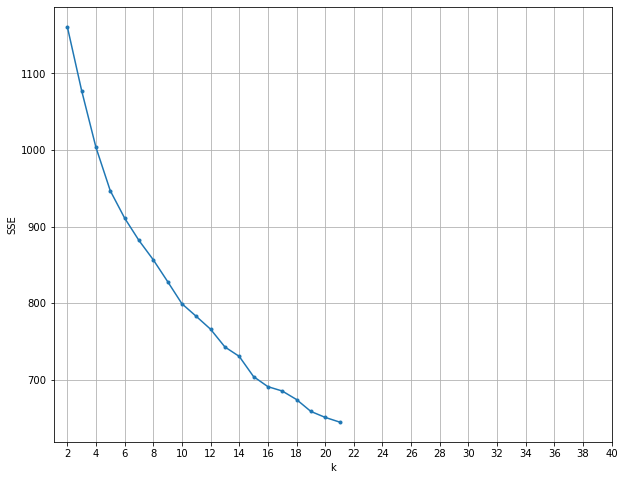

In [41]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 100)[:20], sse_list[:20], marker='.')
plt.ylabel('SSE')
plt.xlabel('k')
plt.xticks(range(2, 102, 2)[:20])
plt.grid()
plt.show()

In [42]:
k_selected = 6

In [43]:
kmeans = KMeans(n_clusters=k_selected)
kmeans.fit(X)

KMeans(n_clusters=6)

In [44]:
centroidi = pd.DataFrame(columns=columns, data=kmeans.cluster_centers_)
centroidi.T

,0,1,2,3,4,5
heterosexual,0.605455,0.577052,0.482002,0.614954,0.597420,0.778873
psychiatric_or_mental_illness,0.699096,0.684497,0.546644,0.695413,0.691276,0.813154
white,0.737616,0.740601,0.590662,0.739504,0.741337,0.826085
transgender,0.770281,0.775560,0.630823,0.775271,0.768407,0.833945
black,0.790706,0.798751,0.666576,0.785821,0.790888,0.840698
bisexual,0.796276,0.820310,0.686389,0.801476,0.809706,0.846845
homosexual_gay_or_lesbian,0.804001,0.829145,0.713098,0.796997,0.807530,0.854832
male,0.821108,0.835640,0.750212,0.835518,0.824115,0.854635
christian,0.829522,0.834615,0.766952,0.746216,0.820638,0.844834
muslim,0.826521,0.834070,0.778396,0.810964,0.830097,0.843265


In [45]:
centroidi.T.to_csv('centroidi.csv', index=False)

In [46]:
lab, counts = np.unique(kmeans.labels_, return_counts=True)

In [47]:
counts

array([ 380, 3524,  952,  247,  440, 1860])

In [48]:
columns2print = columns[::]
columns2print[columns2print.index('psychiatric_or_mental_illness')] = 'mental ill.'
columns2print[columns2print.index('homosexual_gay_or_lesbian')] = 'homosexual'
columns2print[columns2print.index('intellectual_or_learning_disability')] = 'mental dis.'

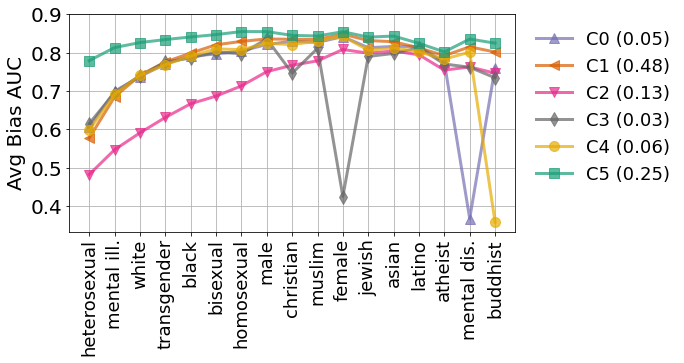

In [49]:
centers = kmeans.cluster_centers_
markers_list = ['^', '<', 'v', 'd', 'o', 's']
colors_list = ['#7570b3', '#d95f02', '#e7298a', '#666666', '#e6ab02', '#1b9e77']
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker=markers_list[i], ms=10, c=colors_list[i], lw=3,
             label='C%s (%.2f)' % (i, counts[i]/len(X)), alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(range(0, len(columns)), columns2print, fontsize=18, rotation=90)
plt.legend(fontsize=18, ncol=1, bbox_to_anchor=(1.01,1), frameon=False)
plt.yticks(np.arange(0.4, 1.0, 0.1))
plt.ylabel('Avg Bias AUC', fontsize=20)
plt.grid()
plt.savefig("cluterplot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

In [50]:
pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

In [55]:
tsne = TSNE(n_components=2, init='random')
X_embedded = tsne.fit_transform(X)

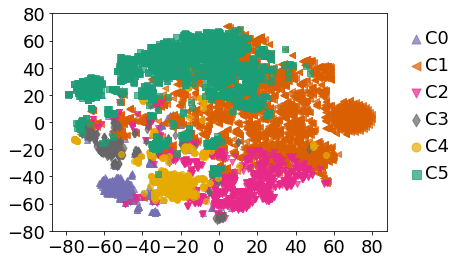

In [56]:
embedded_centers = np.array([np.mean(X_embedded[kmeans.labels_ == i], axis=0) for i in range(6)])
for i in range(6):
    plt.scatter(X_embedded[kmeans.labels_ == i, 0], X_embedded[kmeans.labels_ == i, 1], 
                alpha=0.7, label='C%s' % i, marker=markers_list[i], c=colors_list[i])
plt.legend(fontsize=18, ncol=1, bbox_to_anchor=(1.01,1), frameon=False, handletextpad=0.0, handlelength=1, 
           markerscale=1.5)
plt.yticks(np.arange(-80, 100, 20))
plt.xticks(np.arange(-80, 100, 20))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig("tsne.png", format="png", bbox_inches="tight", dpi=300)
plt.show()